**Solving multi-arm bandit problem using:** <br>
**1.Explore & Exploit** <br>
**2.Epsilon-Greedy** <br>
**3.Upper Confidence Bouns (UCB)** <br
**4.Gradient Learning**

In [145]:
import numpy as np
import matplotlib.pyplot as plt

In [161]:
mu = [-0.3, 0 ,0.2 ,0.3, 0.6]
sigma = 1

In [143]:
def explore_exploit(t):
    tot_rew = [0]*t
    count_arms = {0:[0]*t,1:[0]*t,2:[0]*t,3:[0]*t,4:[0]*t}
    max_mu = max(mu)
    for i in range(1000):
        rew_mean=[0]*5
        for j in range(10):
            rew=np.random.normal(mu[0],1)
            tot_rew[j]+=rew
            rew_mean[0]+=rew
            count_arms[0][j]+=1
        for j in range(10,20):
            rew=np.random.normal(mu[1],1)
            tot_rew[j]+=rew
            rew_mean[1]+=rew
            count_arms[1][j]+=1
        for j in range(20,30):
            rew=np.random.normal(mu[2],1)
            tot_rew[j]+=rew
            rew_mean[2]+=rew
            count_arms[2][j]+=1
        for j in range(30,40):
            rew=np.random.normal(mu[3],1)
            tot_rew[j]+=rew
            rew_mean[3]+=rew
            count_arms[3][j]+=1
        for j in range(40,50):
            rew=np.random.normal(mu[4],1)
            tot_rew[j]+=rew
            rew_mean[4]+=rew
            count_arms[4][j]+=1
        max_mean=rew_mean.index(max(rew_mean))
        for j in range(50,t):
            rew=np.random.normal(mu[max_mean],1)
            tot_rew[j]+=rew
            count_arms[max_mean][j]+=1
    avg_rew = [i/1000 for i in tot_rew]
    cumavg_preg = [max_mu-sum(avg_rew[:i])/i for i in range(1,t+1)]
    total_opt = count_arms[mu.index(max_mu)]
    avg_arm={}
    for key in count_arms:
        avg_arm[key] = [sum(count_arms[key][:i])/1000 for i in range(1,t+1)]
    return avg_rew,cumavg_preg,avg_arm,total_opt

In [116]:
def epsilon_greedy(t,epsilon):
    
    def choose_best_arm(counter):
        best=0
        for i in range(5):
            if (counter[i][0]/counter[i][1]) > (counter[best][0]/counter[best][1]):
                best=i
        return best
        
    tot_rew = [0]*t
    count_arms = {0:[0]*t,1:[0]*t,2:[0]*t,3:[0]*t,4:[0]*t}
    max_mu = max(mu)
    for i in range(1000):
        counter = [[0,0],[0,0],[0,0],[0,0],[0,0]]
        for j in range(5): #pulling each arm once
            rew=np.random.normal(mu[j],1)
            counter[j][0]+=rew
            counter[j][1]+=1
        #print(counter)
        for j in range(t):
            if np.random.random() > epsilon:
                best_arm = choose_best_arm(counter)
                rew=np.random.normal(mu[best_arm],1)
                tot_rew[j]+=rew
                count_arms[best_arm][j]+=1
                counter[best_arm][0]+=rew
                counter[best_arm][1]+=1
            else:
                rand_arm = np.random.randint(5)
                rew=np.random.normal(mu[rand_arm],1)
                tot_rew[j]+=rew
                count_arms[rand_arm][j]+=1
                counter[rand_arm][0]+=rew
                counter[rand_arm][1]+=1              
         
    avg_rew = [i/1000 for i in tot_rew]
    cumavg_preg = [max_mu-sum(avg_rew[:i])/i for i in range(1,t+1)]
    total_opt = count_arms[mu.index(max_mu)]
    avg_arm={}
    for key in count_arms:
        avg_arm[key] = [sum(count_arms[key][:i])/1000 for i in range(1,t+1)]
    return avg_rew,cumavg_preg,avg_arm,total_opt

In [123]:
def UCB(t,C):
    
    def choose_best_arm(counter,j):
        u_bounds = [0]*5
        for i in range(5):
            u_bounds[i] = (counter[i][0]/counter[i][1]) + C*(np.sqrt(np.log(j)/counter[i][1]))
        return u_bounds.index(max(u_bounds))
        
    tot_rew = [0]*t
    count_arms = {0:[0]*t,1:[0]*t,2:[0]*t,3:[0]*t,4:[0]*t}
    max_mu = max(mu)
    for i in range(1000):
        counter = [[0,0],[0,0],[0,0],[0,0],[0,0]]
        for j in range(5):
            rew=np.random.normal(mu[j],1)
            tot_rew[j]+=rew
            count_arms[j][j]+=1
            counter[j][0]+=rew
            counter[j][1]+=1
        #print(counter)
        for j in range(5,t):
            arm = choose_best_arm(counter,j)
            rew=np.random.normal(mu[arm],1)
            tot_rew[j]+=rew
            count_arms[arm][j]+=1
            counter[arm][0]+=rew
            counter[arm][1]+=1           
         
    avg_rew = [i/1000 for i in tot_rew]
    cumavg_preg = [max_mu-sum(avg_rew[:i])/i for i in range(1,t+1)]
    total_opt = count_arms[mu.index(max_mu)]
    avg_arm={}
    for key in count_arms:
        avg_arm[key] = [sum(count_arms[key][:i])/1000 for i in range(1,t+1)]
    return avg_rew,cumavg_preg,avg_arm,total_opt

In [144]:
T=1000
rew_ee, preg_ee, avgt_ee, opt_ee = explore_exploit(T)
rew_eg0, preg_eg0, avgt_eg0, opt_eg0 = epsilon_greedy(T,0)
rew_eg1, preg_eg1, avgt_eg1, opt_eg1 = epsilon_greedy(T,0.1)
rew_eg15, preg_eg15, avgt_eg15, opt_eg15 = epsilon_greedy(T,0.15)
rew_eg2, preg_eg2, avgt_eg2, opt_eg2 = epsilon_greedy(T,0.2)
rew_eg5, preg_eg5, avgt_eg5, opt_eg5 = epsilon_greedy(T,0.5)
rew_ucb1, preg_ucb1, avgt_ucb1, opt_ucb1 = UCB(T,1)
rew_ucb2, preg_ucb2, avgt_ucb2, opt_ucb2 = UCB(T,2)

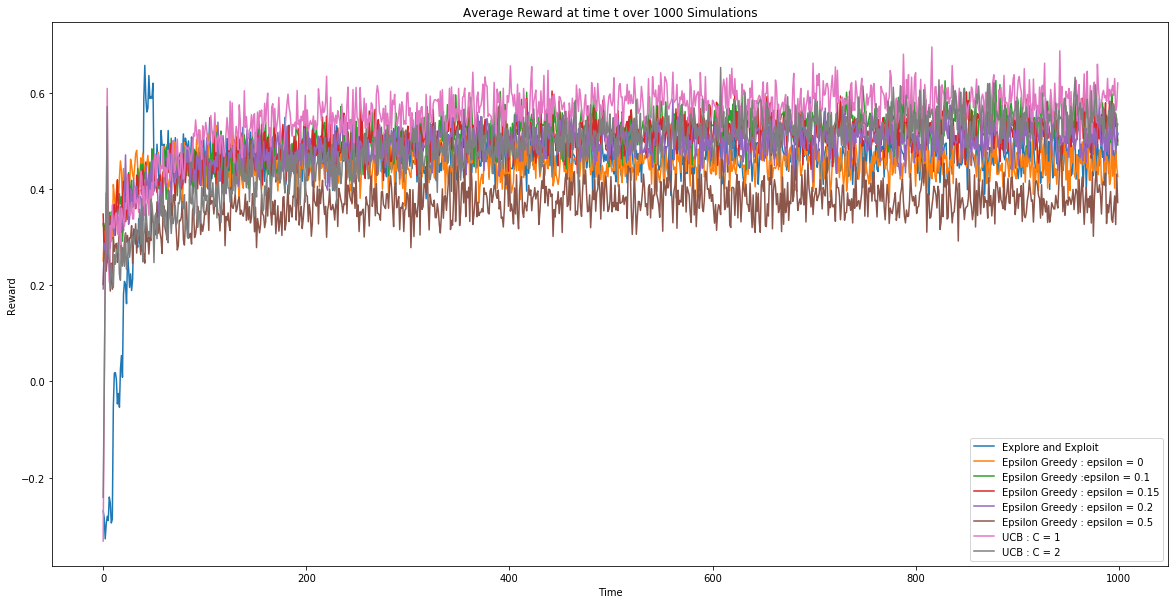

In [147]:
plt.figure(figsize = (20,10))
plt.plot(rew_ee, label = 'Explore and Exploit')
plt.plot(rew_eg0, label = 'Epsilon Greedy : epsilon = 0')
plt.plot(rew_eg1, label = 'Epsilon Greedy :epsilon = 0.1')
plt.plot(rew_eg15, label = 'Epsilon Greedy : epsilon = 0.15')
plt.plot(rew_eg2, label = 'Epsilon Greedy : epsilon = 0.2')
plt.plot(rew_eg5, label = 'Epsilon Greedy : epsilon = 0.5')
plt.plot(rew_ucb1, label = 'UCB : C = 1')
plt.plot(rew_ucb2, label = 'UCB : C = 2')
plt.xlabel('Time')  
plt.ylabel('Reward')
plt.title('Average Reward at time t over 1000 Simulations')
plt.legend(loc='lower right')

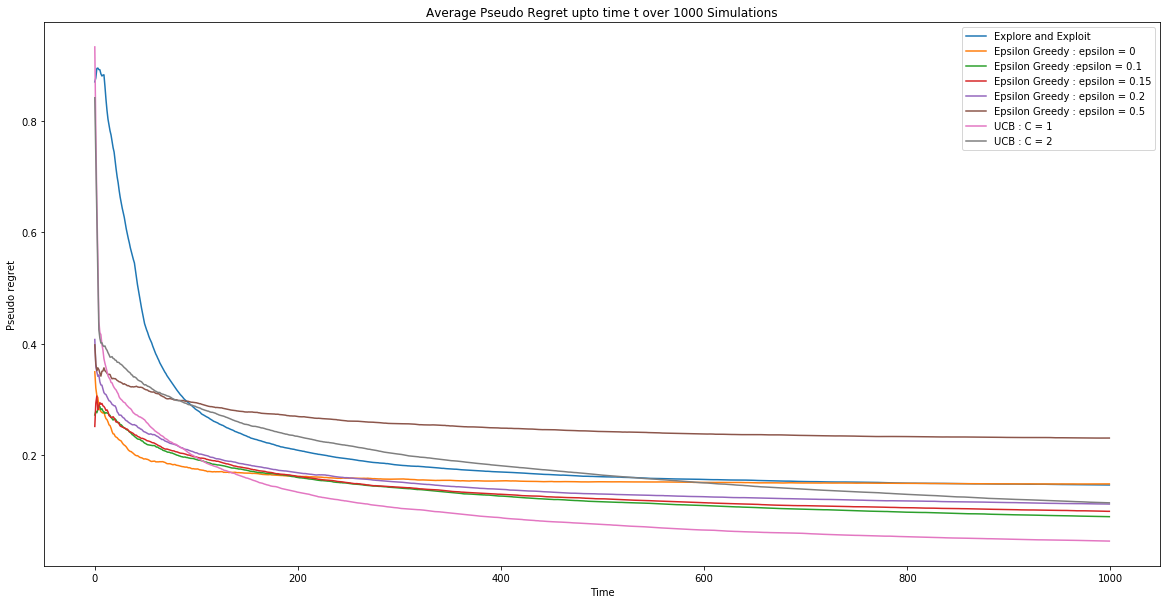

In [148]:
plt.figure(figsize = (20,10))
plt.plot(preg_ee, label = 'Explore and Exploit')
plt.plot(preg_eg0, label = 'Epsilon Greedy : epsilon = 0')
plt.plot(preg_eg1, label = 'Epsilon Greedy :epsilon = 0.1')
plt.plot(preg_eg15, label = 'Epsilon Greedy : epsilon = 0.15')
plt.plot(preg_eg2, label = 'Epsilon Greedy : epsilon = 0.2')
plt.plot(preg_eg5, label = 'Epsilon Greedy : epsilon = 0.5')
plt.plot(preg_ucb1, label = 'UCB : C = 1')
plt.plot(preg_ucb2, label = 'UCB : C = 2')
plt.xlabel('Time')  
plt.ylabel('Pseudo regret')
plt.title('Average Pseudo Regret upto time t over 1000 Simulations')
plt.legend(loc='upper right')

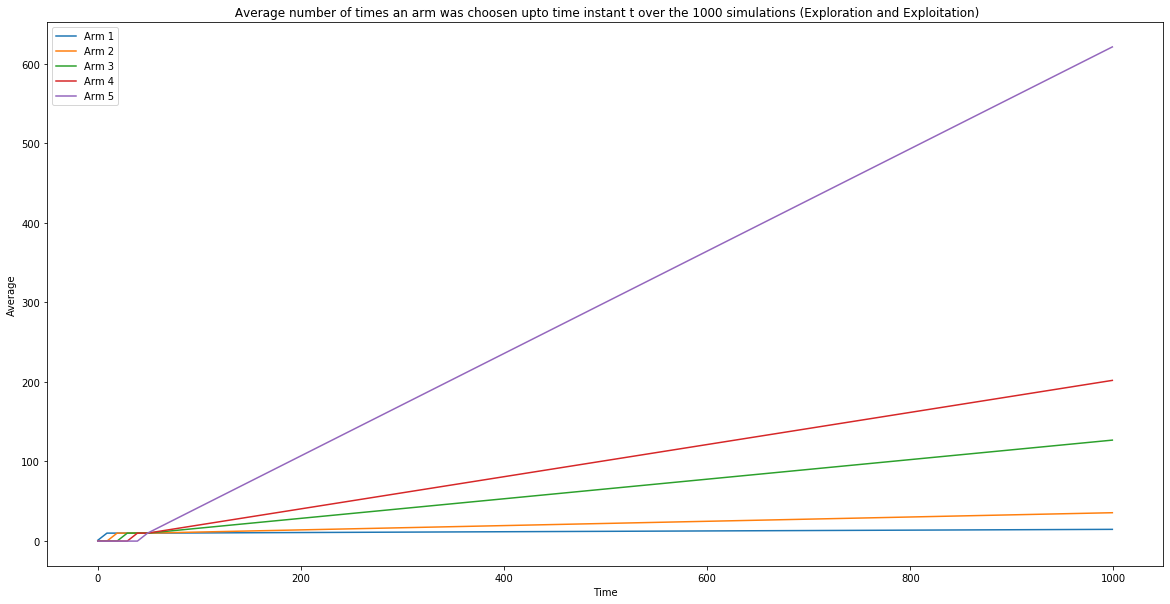

In [151]:
plt.figure(figsize = (20,10))
plt.plot(avgt_ee[0], label = 'Arm 1')
plt.plot(avgt_ee[1], label = 'Arm 2')
plt.plot(avgt_ee[2], label = 'Arm 3')
plt.plot(avgt_ee[3], label = 'Arm 4')
plt.plot(avgt_ee[4], label = 'Arm 5')
plt.xlabel('Time')  
plt.ylabel('Average')
plt.title(' Average number of times an arm was choosen upto time instant t over the 1000 simulations (Exploration and Exploitation)')
plt.legend(loc='upper left')

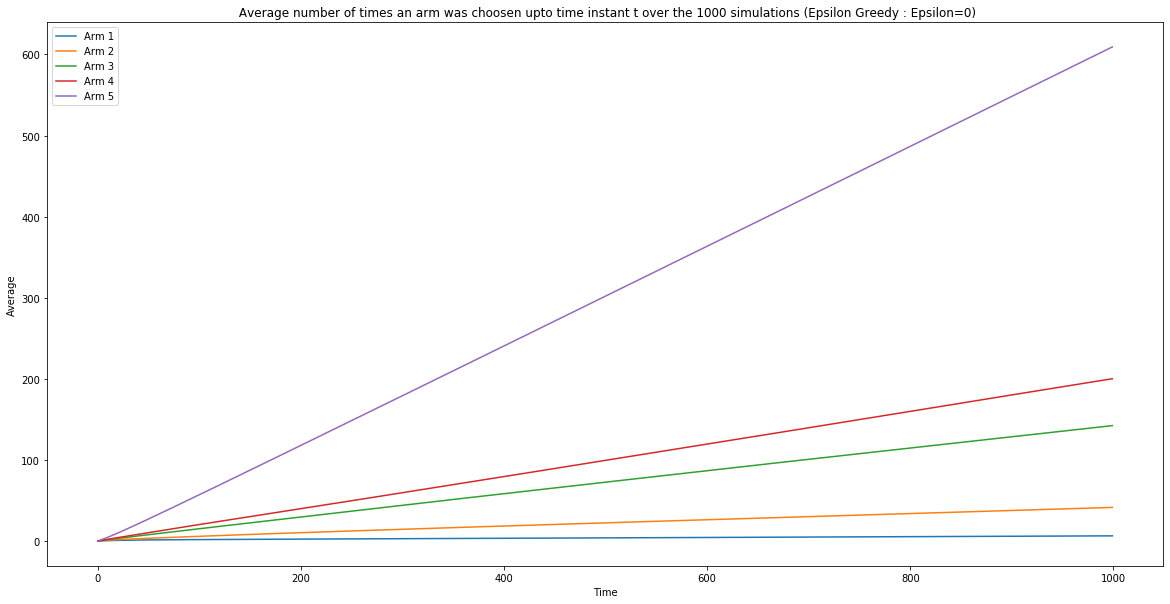

In [152]:
plt.figure(figsize = (20,10))
plt.plot(avgt_eg0[0], label = 'Arm 1')
plt.plot(avgt_eg0[1], label = 'Arm 2')
plt.plot(avgt_eg0[2], label = 'Arm 3')
plt.plot(avgt_eg0[3], label = 'Arm 4')
plt.plot(avgt_eg0[4], label = 'Arm 5')
plt.xlabel('Time')  
plt.ylabel('Average')
plt.title(' Average number of times an arm was choosen upto time instant t over the 1000 simulations (Epsilon Greedy : Epsilon=0)')
plt.legend(loc='upper left')

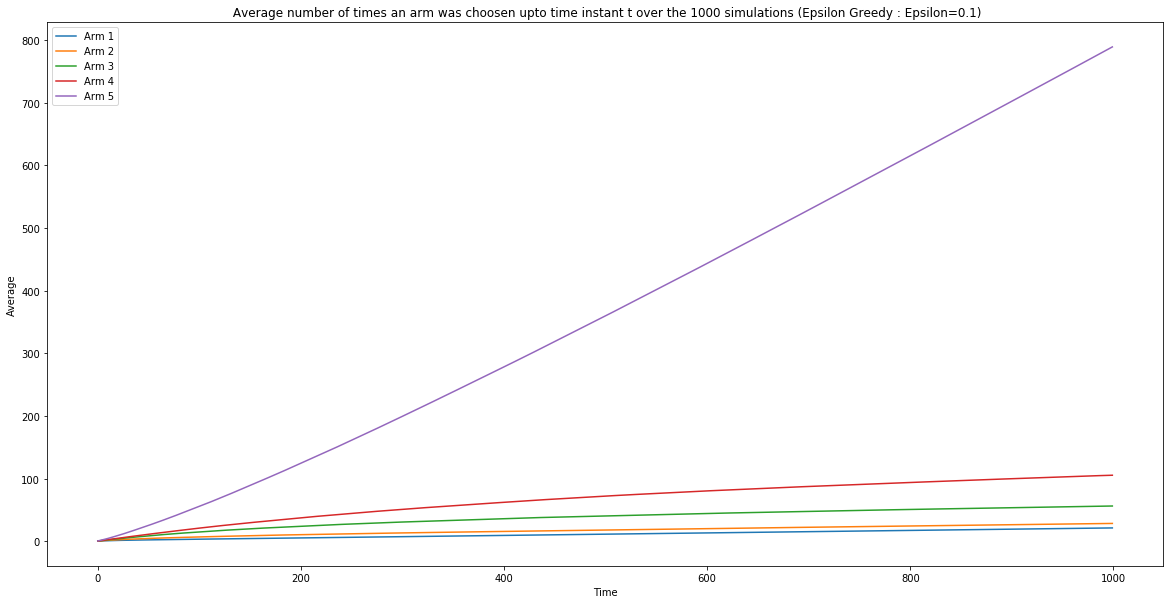

In [153]:
plt.figure(figsize = (20,10))
plt.plot(avgt_eg1[0], label = 'Arm 1')
plt.plot(avgt_eg1[1], label = 'Arm 2')
plt.plot(avgt_eg1[2], label = 'Arm 3')
plt.plot(avgt_eg1[3], label = 'Arm 4')
plt.plot(avgt_eg1[4], label = 'Arm 5')
plt.xlabel('Time')  
plt.ylabel('Average')
plt.title(' Average number of times an arm was choosen upto time instant t over the 1000 simulations (Epsilon Greedy : Epsilon=0.1)')
plt.legend(loc='upper left')

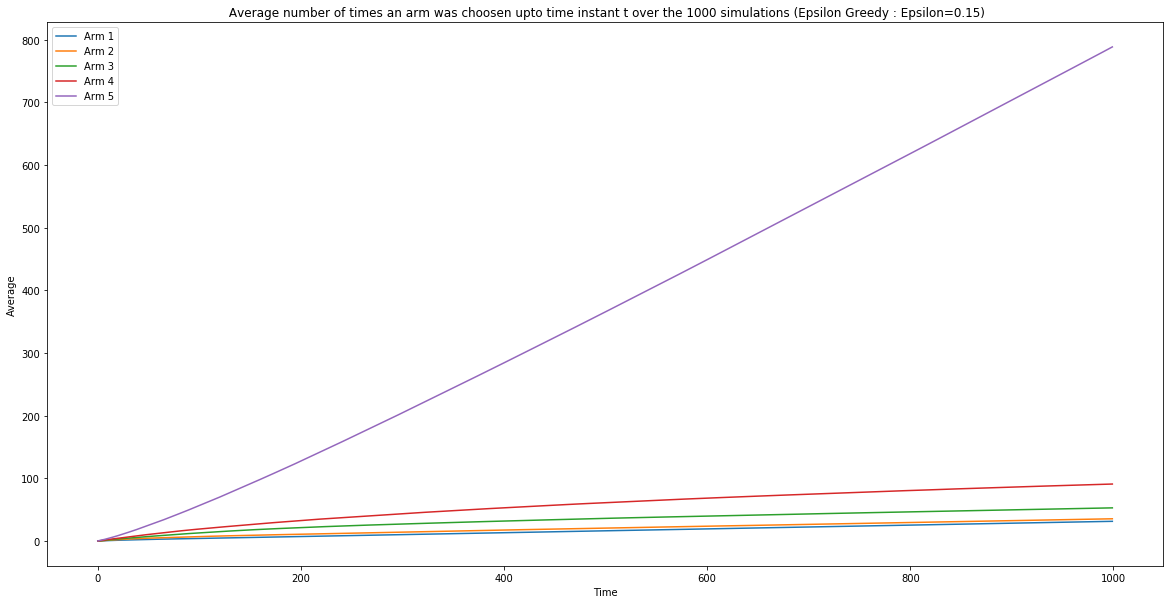

In [154]:
plt.figure(figsize = (20,10))
plt.plot(avgt_eg15[0], label = 'Arm 1')
plt.plot(avgt_eg15[1], label = 'Arm 2')
plt.plot(avgt_eg15[2], label = 'Arm 3')
plt.plot(avgt_eg15[3], label = 'Arm 4')
plt.plot(avgt_eg15[4], label = 'Arm 5')
plt.xlabel('Time')  
plt.ylabel('Average')
plt.title(' Average number of times an arm was choosen upto time instant t over the 1000 simulations (Epsilon Greedy : Epsilon=0.15)')
plt.legend(loc='upper left')

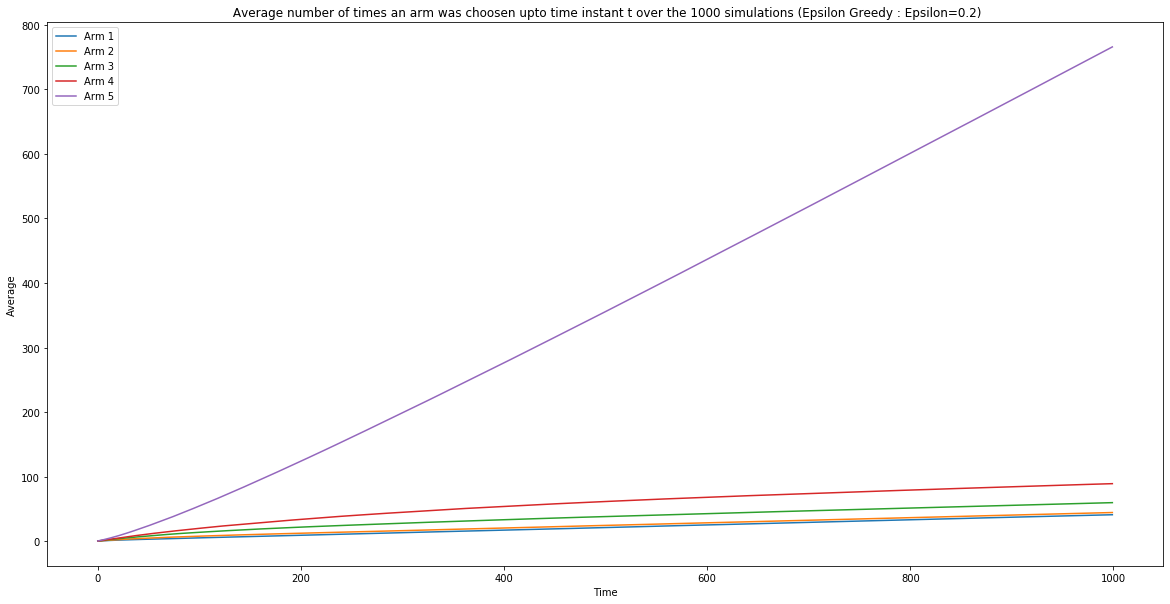

In [156]:
plt.figure(figsize = (20,10))
plt.plot(avgt_eg2[0], label = 'Arm 1')
plt.plot(avgt_eg2[1], label = 'Arm 2')
plt.plot(avgt_eg2[2], label = 'Arm 3')
plt.plot(avgt_eg2[3], label = 'Arm 4')
plt.plot(avgt_eg2[4], label = 'Arm 5')
plt.xlabel('Time')  
plt.ylabel('Average')
plt.title(' Average number of times an arm was choosen upto time instant t over the 1000 simulations (Epsilon Greedy : Epsilon=0.2)')
plt.legend(loc='upper left')

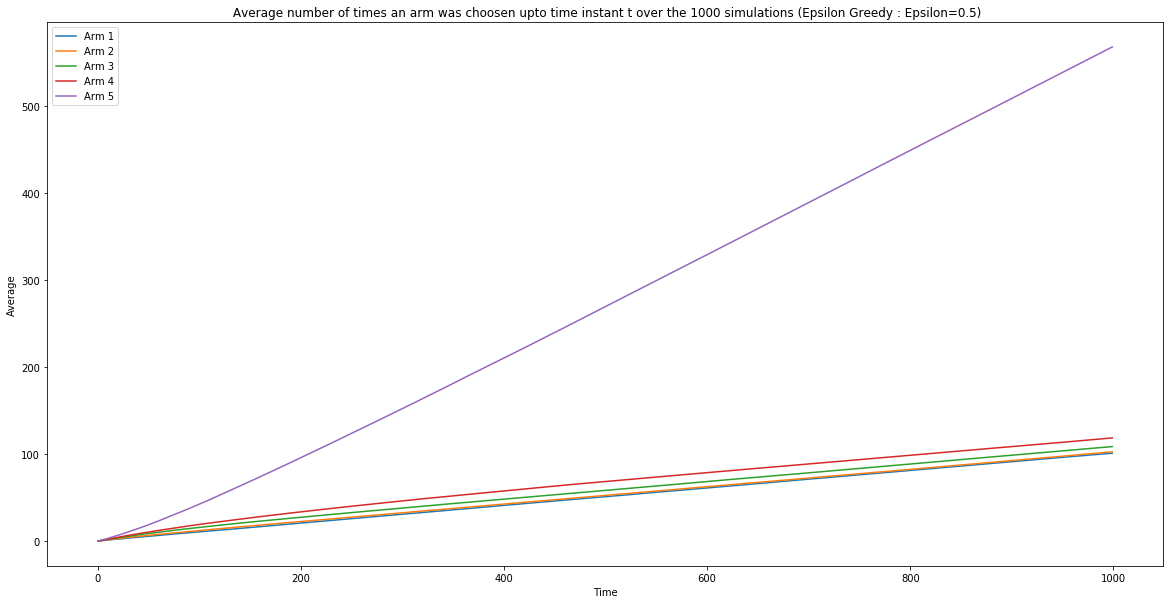

In [157]:
plt.figure(figsize = (20,10))
plt.plot(avgt_eg5[0], label = 'Arm 1')
plt.plot(avgt_eg5[1], label = 'Arm 2')
plt.plot(avgt_eg5[2], label = 'Arm 3')
plt.plot(avgt_eg5[3], label = 'Arm 4')
plt.plot(avgt_eg5[4], label = 'Arm 5')
plt.xlabel('Time')  
plt.ylabel('Average')
plt.title(' Average number of times an arm was choosen upto time instant t over the 1000 simulations (Epsilon Greedy : Epsilon=0.5)')
plt.legend(loc='upper left')

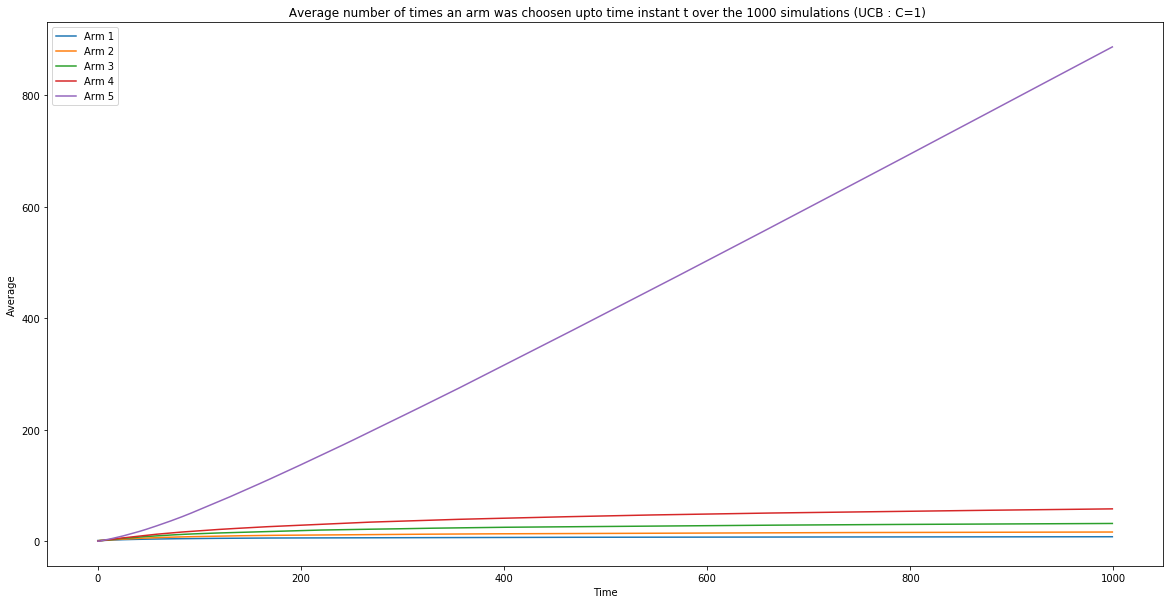

In [158]:
plt.figure(figsize = (20,10))
plt.plot(avgt_ucb1[0], label = 'Arm 1')
plt.plot(avgt_ucb1[1], label = 'Arm 2')
plt.plot(avgt_ucb1[2], label = 'Arm 3')
plt.plot(avgt_ucb1[3], label = 'Arm 4')
plt.plot(avgt_ucb1[4], label = 'Arm 5')
plt.xlabel('Time')  
plt.ylabel('Average')
plt.title(' Average number of times an arm was choosen upto time instant t over the 1000 simulations (UCB : C=1)')
plt.legend(loc='upper left')

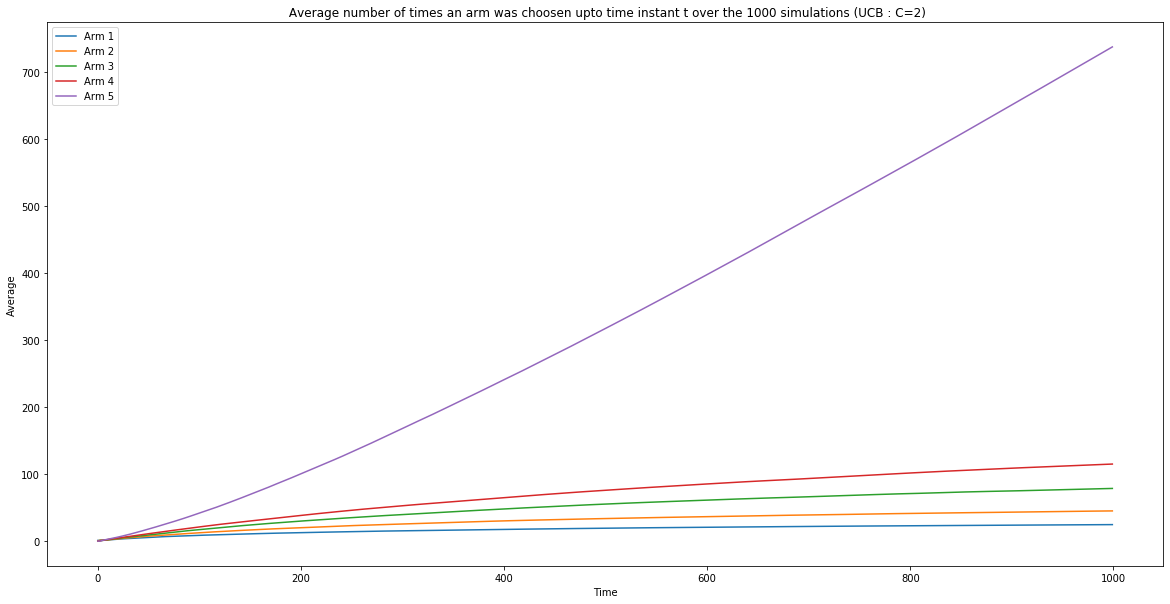

In [159]:
plt.figure(figsize = (20,10))
plt.plot(avgt_ucb2[0], label = 'Arm 1')
plt.plot(avgt_ucb2[1], label = 'Arm 2')
plt.plot(avgt_ucb2[2], label = 'Arm 3')
plt.plot(avgt_ucb2[3], label = 'Arm 4')
plt.plot(avgt_ucb2[4], label = 'Arm 5')
plt.xlabel('Time')  
plt.ylabel('Average')
plt.title(' Average number of times an arm was choosen upto time instant t over the 1000 simulations (UCB : C=2)')
plt.legend(loc='upper left')

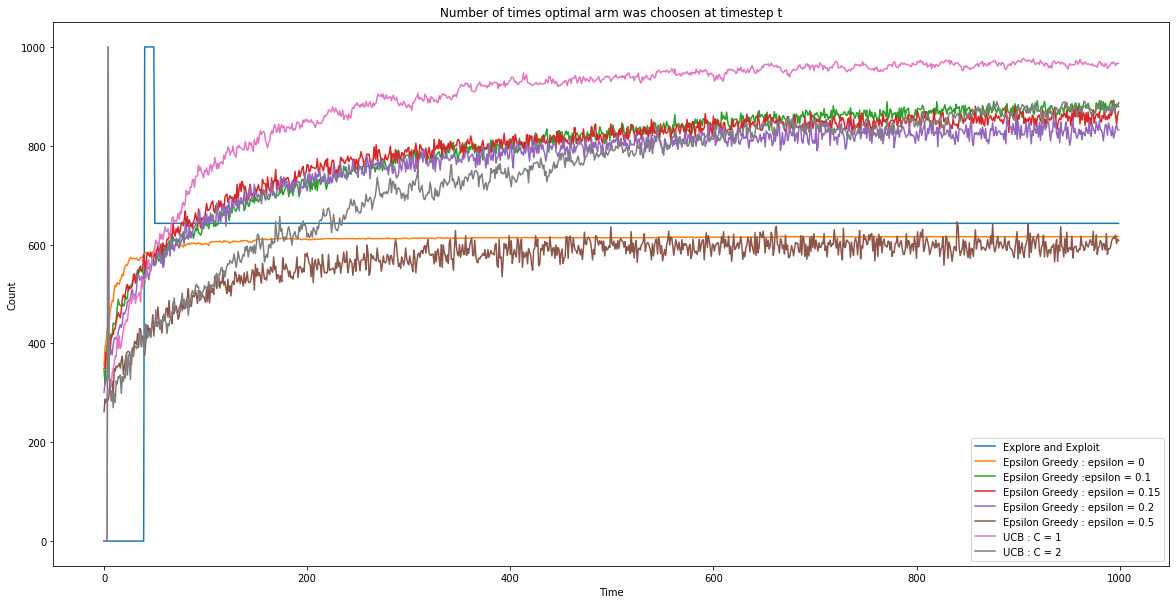

In [160]:
plt.figure(figsize = (20,10))
plt.plot(opt_ee, label = 'Explore and Exploit')
plt.plot(opt_eg0, label = 'Epsilon Greedy : epsilon = 0')
plt.plot(opt_eg1, label = 'Epsilon Greedy :epsilon = 0.1')
plt.plot(opt_eg15, label = 'Epsilon Greedy : epsilon = 0.15')
plt.plot(opt_eg2, label = 'Epsilon Greedy : epsilon = 0.2')
plt.plot(opt_eg5, label = 'Epsilon Greedy : epsilon = 0.5')
plt.plot(opt_ucb1, label = 'UCB : C = 1')
plt.plot(opt_ucb2, label = 'UCB : C = 2')
plt.xlabel('Time')  
plt.ylabel('Count')
plt.title('Number of times optimal arm was choosen at timestep t')
plt.legend(loc='lower right')

In [162]:
def vanishing_epsilon_greedy(t,epsilon):
    
    def choose_best_arm(counter):
        best=0
        for i in range(5):
            if (counter[i][0]/counter[i][1]) > (counter[best][0]/counter[best][1]):
                best=i
        return best
        
    tot_rew = [0]*t
    count_arms = {0:[0]*t,1:[0]*t,2:[0]*t,3:[0]*t,4:[0]*t}
    max_mu = max(mu)
    for i in range(1000):
        counter = [[0,0],[0,0],[0,0],[0,0],[0,0]]
        for j in range(5):
            rew=np.random.normal(mu[j],1)
            counter[j][0]+=rew
            counter[j][1]+=1
        #print(counter)
        for j in range(t):
            if np.random.random() > (epsilon/(j+1)):
                best_arm = choose_best_arm(counter)
                rew=np.random.normal(mu[best_arm],1)
                tot_rew[j]+=rew
                count_arms[best_arm][j]+=1
                counter[best_arm][0]+=rew
                counter[best_arm][1]+=1
            else:
                rand_arm = np.random.randint(5)
                rew=np.random.normal(mu[rand_arm],1)
                tot_rew[j]+=rew
                count_arms[rand_arm][j]+=1
                counter[rand_arm][0]+=rew
                counter[rand_arm][1]+=1              
         
    avg_rew = [i/1000 for i in tot_rew]
    cumavg_preg = [max_mu-sum(avg_rew[:i])/i for i in range(1,t+1)]
    total_opt = count_arms[mu.index(max_mu)]
    avg_arm={}
    for key in count_arms:
        avg_arm[key] = [sum(count_arms[key][:i])/1000 for i in range(1,t+1)]
    return avg_rew,cumavg_preg,avg_arm,total_opt

In [163]:
rew_veg, preg_veg, avgt_veg, opt_veg = epsilon_greedy(1000,0.2)

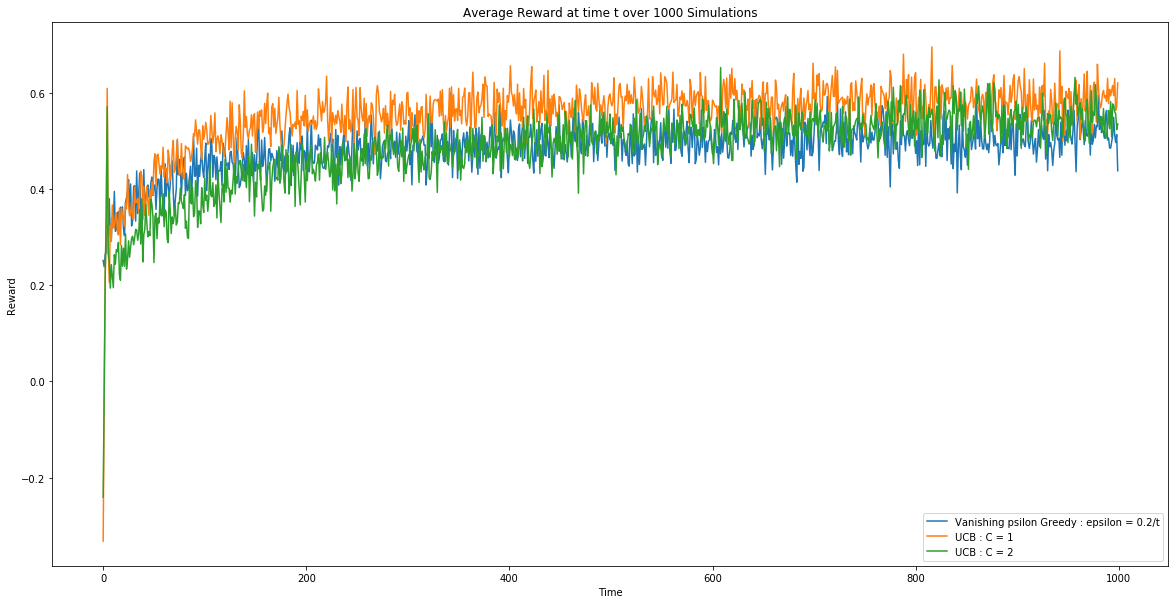

In [164]:
plt.figure(figsize = (20,10))
plt.plot(rew_veg, label = 'Vanishing psilon Greedy : epsilon = 0.2/t')
plt.plot(rew_ucb1, label = 'UCB : C = 1')
plt.plot(rew_ucb2, label = 'UCB : C = 2')
plt.xlabel('Time')  
plt.ylabel('Reward')
plt.title('Average Reward at time t over 1000 Simulations')
plt.legend(loc='lower right')

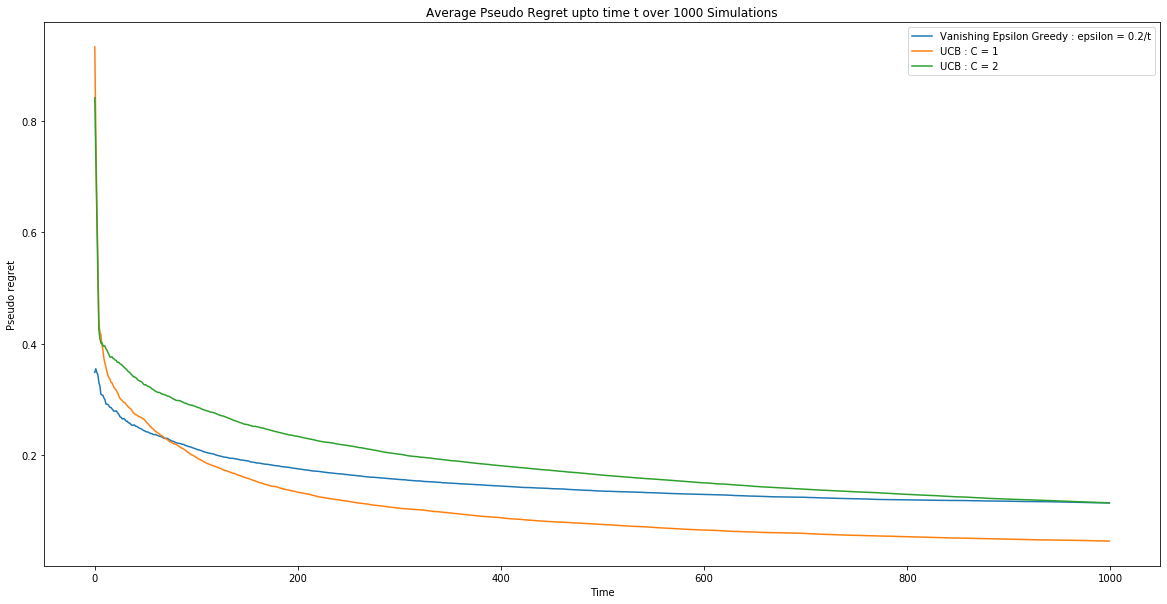

In [166]:
plt.figure(figsize = (20,10))
plt.plot(preg_veg, label = 'Vanishing Epsilon Greedy : epsilon = 0.2/t')
plt.plot(preg_ucb1, label = 'UCB : C = 1')
plt.plot(preg_ucb2, label = 'UCB : C = 2')
plt.xlabel('Time')  
plt.ylabel('Pseudo regret')
plt.title('Average Pseudo Regret upto time t over 1000 Simulations')
plt.legend(loc='upper right')

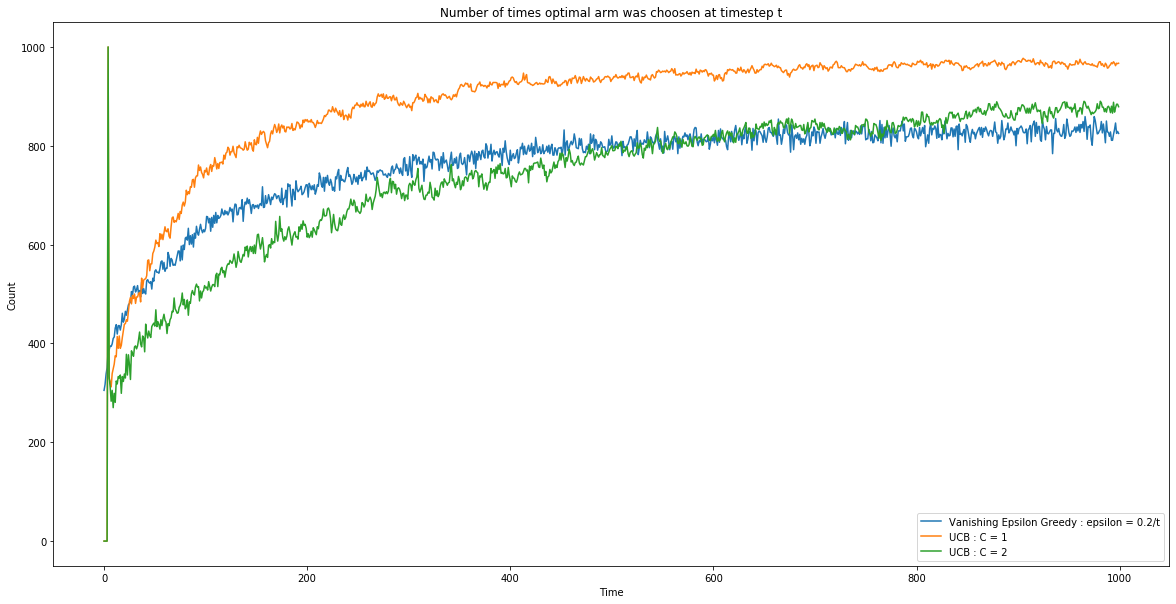

In [167]:
plt.figure(figsize = (20,10))
plt.plot(opt_veg, label = 'Vanishing Epsilon Greedy : epsilon = 0.2/t')
plt.plot(opt_ucb1, label = 'UCB : C = 1')
plt.plot(opt_ucb2, label = 'UCB : C = 2')
plt.xlabel('Time')  
plt.ylabel('Count')
plt.title('Number of times optimal arm was choosen at timestep t')
plt.legend(loc='lower right')

In [187]:
def gradient_bandit_baseline(t,alpha):
    
    tot_rew = [0]*t
    count_arms = {0:[0]*t,1:[0]*t,2:[0]*t,3:[0]*t,4:[0]*t}
    max_mu = max(mu)
    
    for i in range(1000):
        counter = [[0,0],[0,0],[0,0],[0,0],[0,0]]
        rewards=[]
        H=[0]*5
        for j in range(t):
            p = np.exp(H)/sum(np.exp(H)) 
            arm = np.random.choice(5, p = p)
            rew = np.random.normal(mu[arm], 1)
            rewards.append(rew)
            avg_rew = sum(rewards)/len(rewards)
            
            tot_rew[j]+=rew
            count_arms[arm][j]+=1
            counter[arm][0]+=rew
            counter[arm][1]+=1 
        
            H[arm] = H[arm] + alpha*(1-p[arm])*(rew-avg_rew)
            H[:arm] = H[:arm] - alpha*p[:arm]*(rew-avg_rew)
            H[arm+1:] = H[arm+1:] - alpha*p[arm+1:]*(rew-avg_rew)           
         
    avg_rew = [i/1000 for i in tot_rew]
    cumavg_preg = [max_mu-sum(avg_rew[:i])/i for i in range(1,t+1)]
    total_opt = count_arms[mu.index(max_mu)]
    avg_arm={}
    for key in count_arms:
        avg_arm[key] = [sum(count_arms[key][:i])/1000 for i in range(1,t+1)]
    return avg_rew,cumavg_preg,avg_arm,total_opt

In [186]:
def gradient_bandit(t,alpha):
    
    tot_rew = [0]*t
    count_arms = {0:[0]*t,1:[0]*t,2:[0]*t,3:[0]*t,4:[0]*t}
    max_mu = max(mu)
    
    for i in range(1000):
        counter = [[0,0],[0,0],[0,0],[0,0],[0,0]]
        rewards=[]
        H=[0]*5
        for j in range(t):
            p = np.exp(H)/sum(np.exp(H)) 
            arm = np.random.choice(5, p = p)
            rew = np.random.normal(mu[arm], 1)
            
            tot_rew[j]+=rew
            count_arms[arm][j]+=1
            counter[arm][0]+=rew
            counter[arm][1]+=1 
        
            H[arm] = H[arm] + alpha*(1-p[arm])*(rew)
            H[:arm] = H[:arm] - alpha*p[:arm]*(rew)
            H[arm+1:] = H[arm+1:] - alpha*p[arm+1:]*(rew)           
         
    avg_rew = [i/1000 for i in tot_rew]
    cumavg_preg = [max_mu-sum(avg_rew[:i])/i for i in range(1,t+1)]
    total_opt = count_arms[mu.index(max_mu)]
    avg_arm={}
    for key in count_arms:
        avg_arm[key] = [sum(count_arms[key][:i])/1000 for i in range(1,t+1)]
    return avg_rew,cumavg_preg,avg_arm,total_opt

In [192]:
T=1000
rew_gbb1, preg_gbb1, avgt_gbb1, opt_gbb1 = gradient_bandit_baseline(T,0.1)
rew_gb1, preg_gb1, avgt_gb1, opt_gb1 = gradient_bandit(T,0.1)
rew_gbb2, preg_gbb2, avgt_gbb2, opt_gbb2 = gradient_bandit_baseline(T,0.2)
rew_gb2, preg_gb2, avgt_gb2, opt_gb2 = gradient_bandit(T,0.2)
rew_gbb5, preg_gbb5, avgt_gbb5, opt_gbb5 = gradient_bandit_baseline(T,0.5)
rew_gb5, preg_gb5, avgt_gb5, opt_gb5 = gradient_bandit(T,0.5)


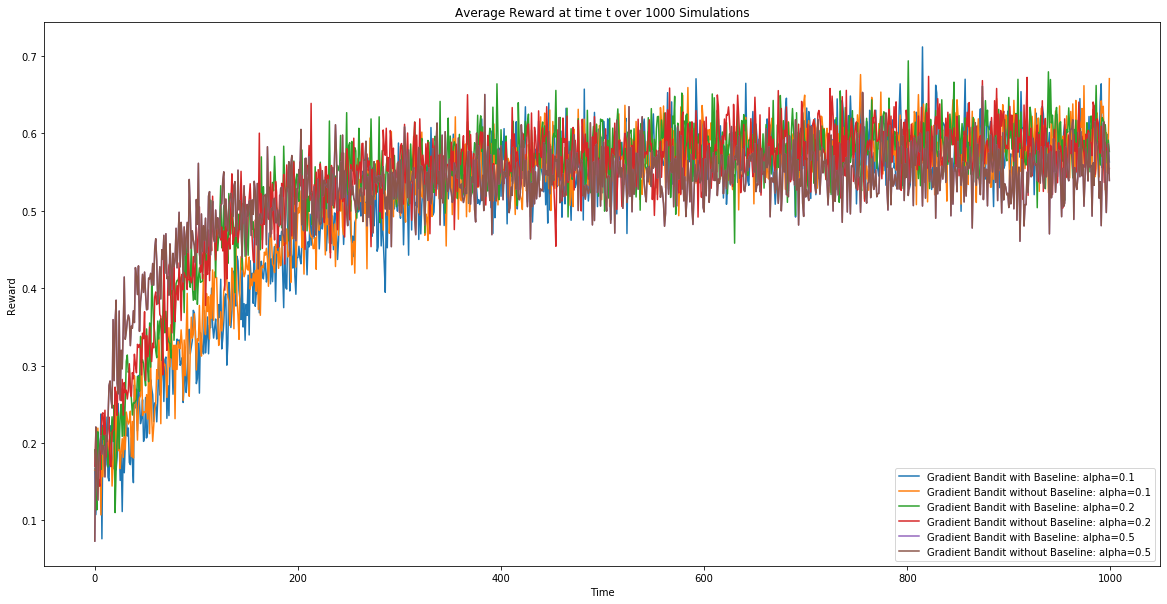

In [193]:
plt.figure(figsize = (20,10))
plt.plot(rew_gbb1, label = 'Gradient Bandit with Baseline: alpha=0.1')
plt.plot(rew_gb1, label = 'Gradient Bandit without Baseline: alpha=0.1')
plt.plot(rew_gbb2, label = 'Gradient Bandit with Baseline: alpha=0.2')
plt.plot(rew_gb2, label = 'Gradient Bandit without Baseline: alpha=0.2')
plt.plot(rew_gbb5, label = 'Gradient Bandit with Baseline: alpha=0.5')
plt.plot(rew_gbb5, label = 'Gradient Bandit without Baseline: alpha=0.5')
plt.xlabel('Time')  
plt.ylabel('Reward')
plt.title('Average Reward at time t over 1000 Simulations')
plt.legend(loc='lower right')

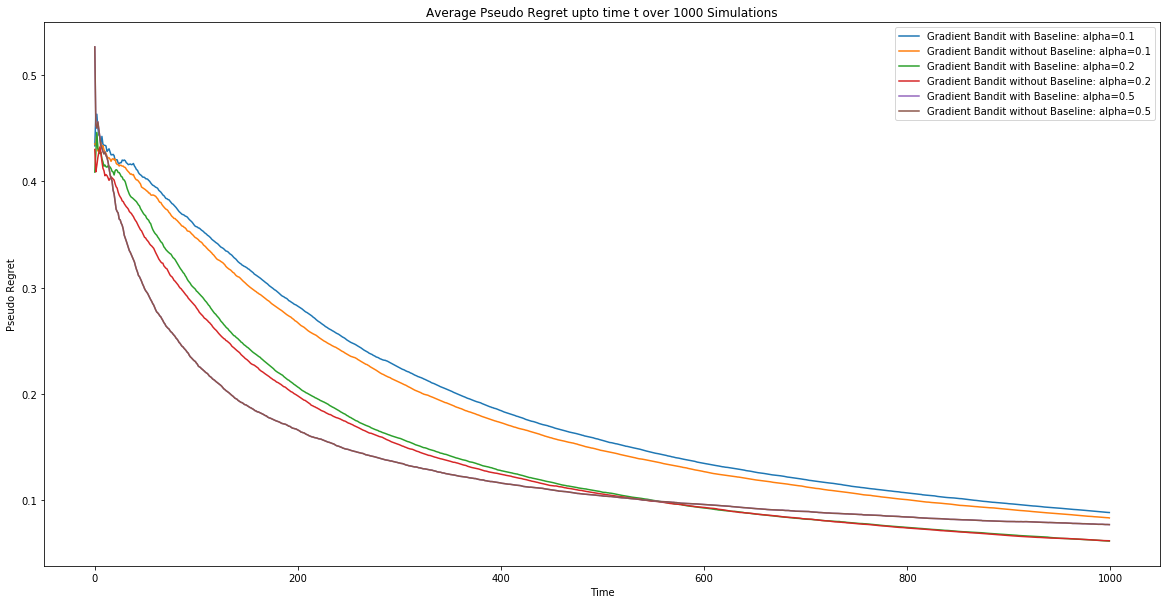

In [195]:
plt.figure(figsize = (20,10))
plt.plot(preg_gbb1, label = 'Gradient Bandit with Baseline: alpha=0.1')
plt.plot(preg_gb1, label = 'Gradient Bandit without Baseline: alpha=0.1')
plt.plot(preg_gbb2, label = 'Gradient Bandit with Baseline: alpha=0.2')
plt.plot(preg_gb2, label = 'Gradient Bandit without Baseline: alpha=0.2')
plt.plot(preg_gbb5, label = 'Gradient Bandit with Baseline: alpha=0.5')
plt.plot(preg_gbb5, label = 'Gradient Bandit without Baseline: alpha=0.5')
plt.xlabel('Time')  
plt.ylabel('Pseudo Regret')
plt.title('Average Pseudo Regret upto time t over 1000 Simulations')
plt.legend(loc='upper right')

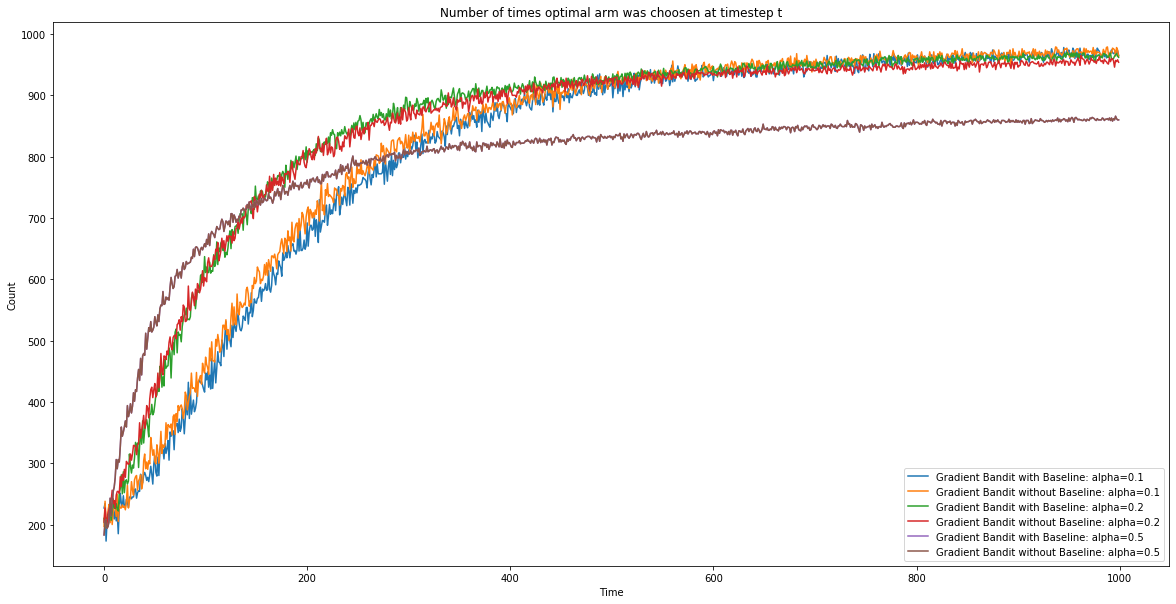

In [196]:
plt.figure(figsize = (20,10))
plt.plot(opt_gbb1, label = 'Gradient Bandit with Baseline: alpha=0.1')
plt.plot(opt_gb1, label = 'Gradient Bandit without Baseline: alpha=0.1')
plt.plot(opt_gbb2, label = 'Gradient Bandit with Baseline: alpha=0.2')
plt.plot(opt_gb2, label = 'Gradient Bandit without Baseline: alpha=0.2')
plt.plot(opt_gbb5, label = 'Gradient Bandit with Baseline: alpha=0.5')
plt.plot(opt_gbb5, label = 'Gradient Bandit without Baseline: alpha=0.5')
plt.xlabel('Time')  
plt.ylabel('Count')
plt.title('Number of times optimal arm was choosen at timestep t')
plt.legend(loc='lower right')

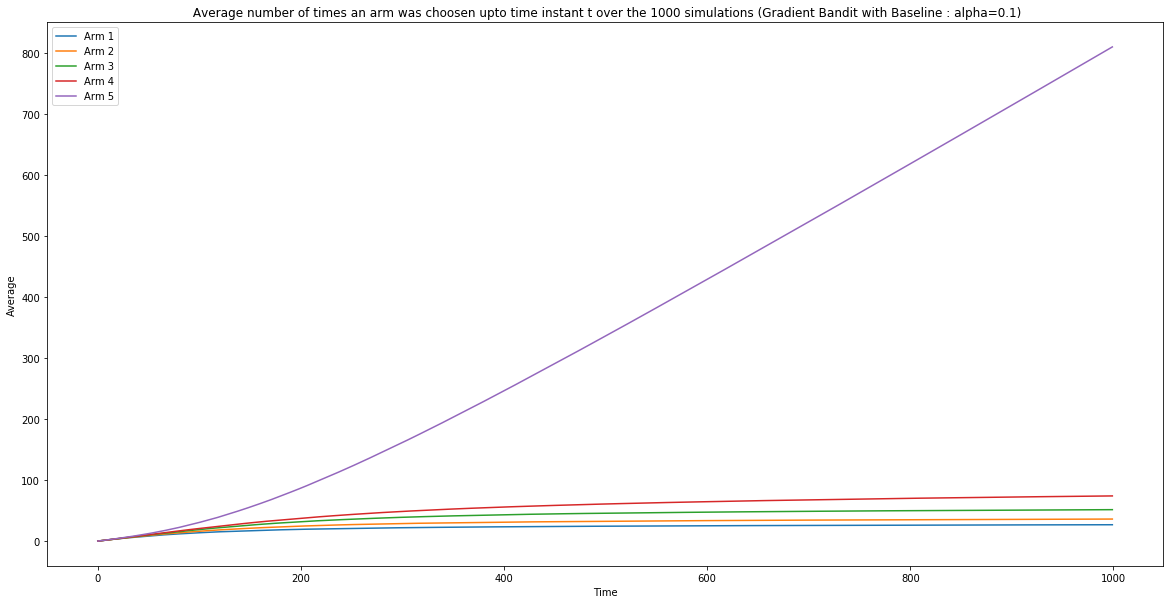

In [197]:
plt.figure(figsize = (20,10))
plt.plot(avgt_gbb1[0], label = 'Arm 1')
plt.plot(avgt_gbb1[1], label = 'Arm 2')
plt.plot(avgt_gbb1[2], label = 'Arm 3')
plt.plot(avgt_gbb1[3], label = 'Arm 4')
plt.plot(avgt_gbb1[4], label = 'Arm 5')
plt.xlabel('Time')  
plt.ylabel('Average')
plt.title(' Average number of times an arm was choosen upto time instant t over the 1000 simulations (Gradient Bandit with Baseline : alpha=0.1)')
plt.legend(loc='upper left')

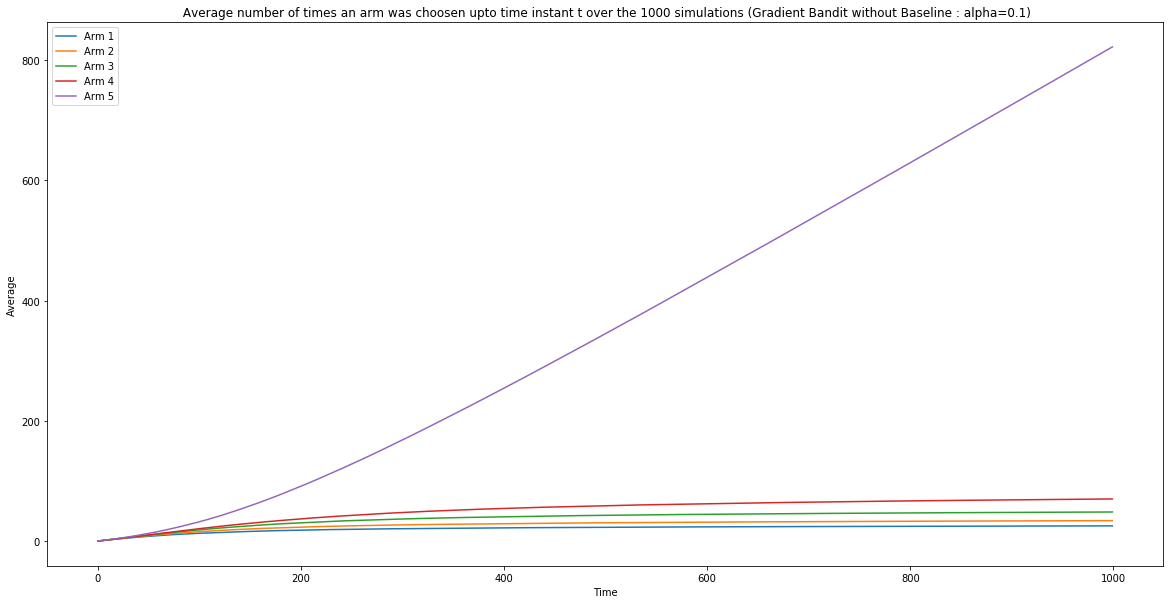

In [198]:
plt.figure(figsize = (20,10))
plt.plot(avgt_gb1[0], label = 'Arm 1')
plt.plot(avgt_gb1[1], label = 'Arm 2')
plt.plot(avgt_gb1[2], label = 'Arm 3')
plt.plot(avgt_gb1[3], label = 'Arm 4')
plt.plot(avgt_gb1[4], label = 'Arm 5')
plt.xlabel('Time')  
plt.ylabel('Average')
plt.title(' Average number of times an arm was choosen upto time instant t over the 1000 simulations (Gradient Bandit without Baseline : alpha=0.1)')
plt.legend(loc='upper left')

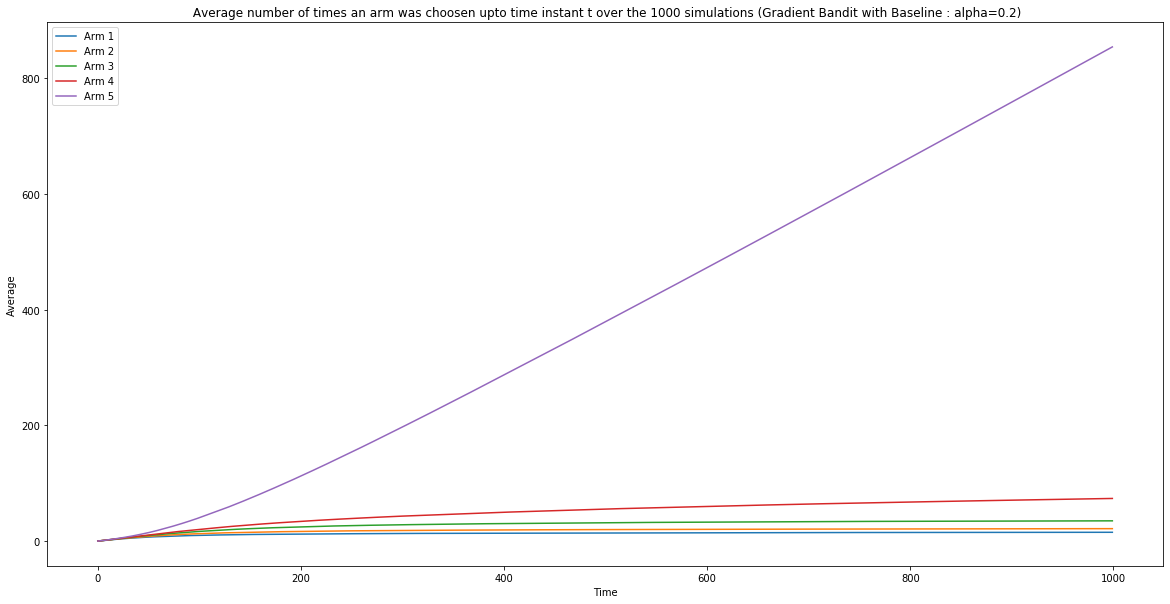

In [199]:
plt.figure(figsize = (20,10))
plt.plot(avgt_gbb2[0], label = 'Arm 1')
plt.plot(avgt_gbb2[1], label = 'Arm 2')
plt.plot(avgt_gbb2[2], label = 'Arm 3')
plt.plot(avgt_gbb2[3], label = 'Arm 4')
plt.plot(avgt_gbb2[4], label = 'Arm 5')
plt.xlabel('Time')  
plt.ylabel('Average')
plt.title(' Average number of times an arm was choosen upto time instant t over the 1000 simulations (Gradient Bandit with Baseline : alpha=0.2)')
plt.legend(loc='upper left')

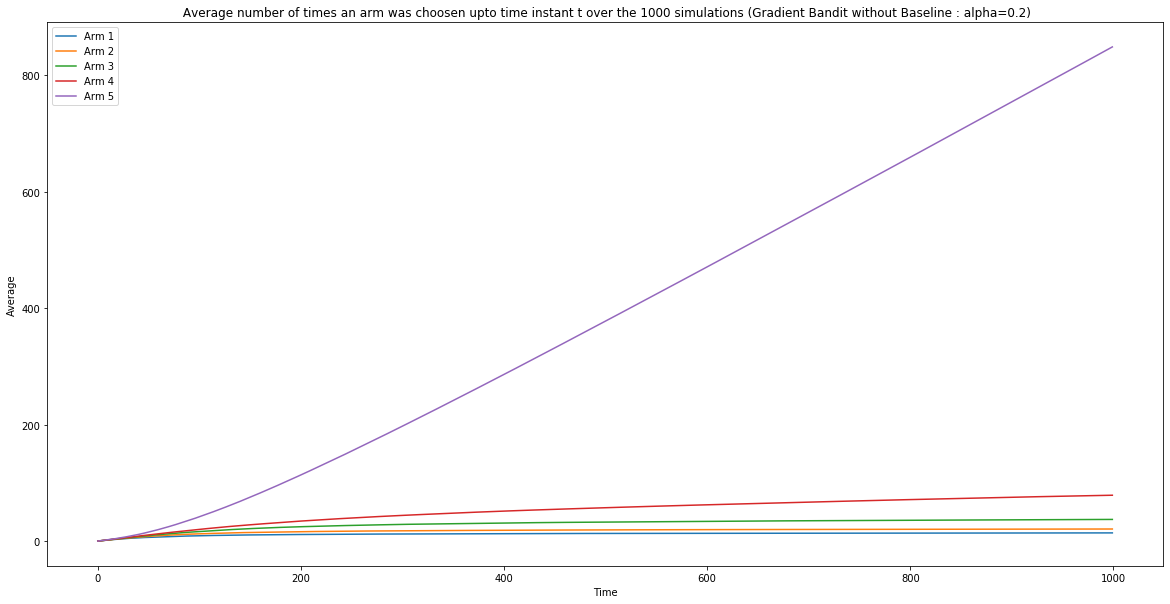

In [200]:
plt.figure(figsize = (20,10))
plt.plot(avgt_gb2[0], label = 'Arm 1')
plt.plot(avgt_gb2[1], label = 'Arm 2')
plt.plot(avgt_gb2[2], label = 'Arm 3')
plt.plot(avgt_gb2[3], label = 'Arm 4')
plt.plot(avgt_gb2[4], label = 'Arm 5')
plt.xlabel('Time')  
plt.ylabel('Average')
plt.title(' Average number of times an arm was choosen upto time instant t over the 1000 simulations (Gradient Bandit without Baseline : alpha=0.2)')
plt.legend(loc='upper left')

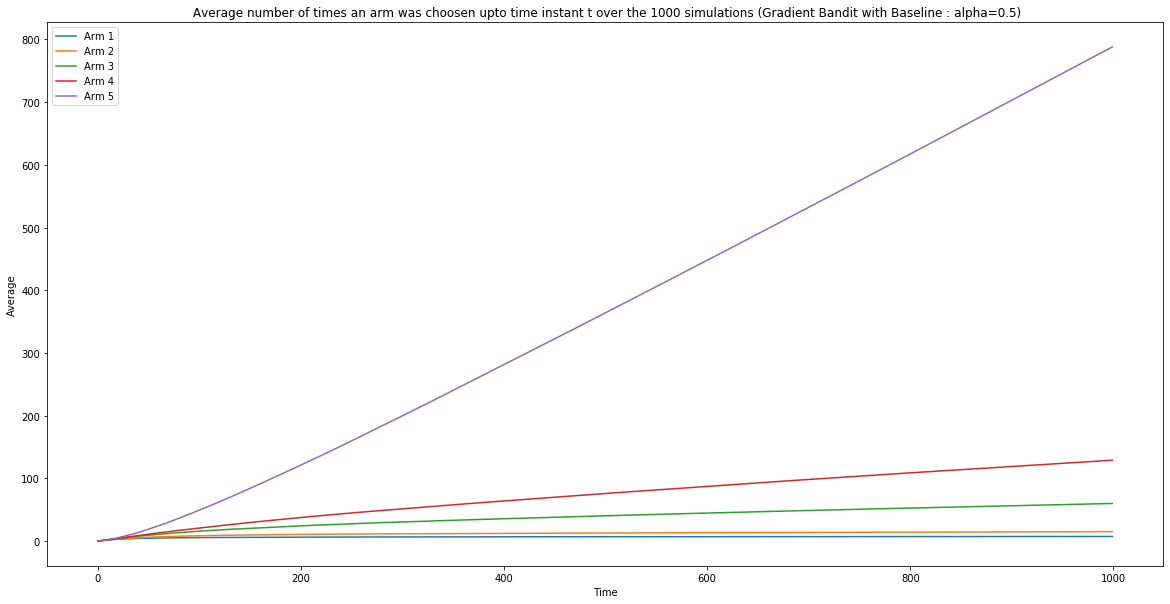

In [201]:
plt.figure(figsize = (20,10))
plt.plot(avgt_gbb5[0], label = 'Arm 1')
plt.plot(avgt_gbb5[1], label = 'Arm 2')
plt.plot(avgt_gbb5[2], label = 'Arm 3')
plt.plot(avgt_gbb5[3], label = 'Arm 4')
plt.plot(avgt_gbb5[4], label = 'Arm 5')
plt.xlabel('Time')  
plt.ylabel('Average')
plt.title(' Average number of times an arm was choosen upto time instant t over the 1000 simulations (Gradient Bandit with Baseline : alpha=0.5)')
plt.legend(loc='upper left')

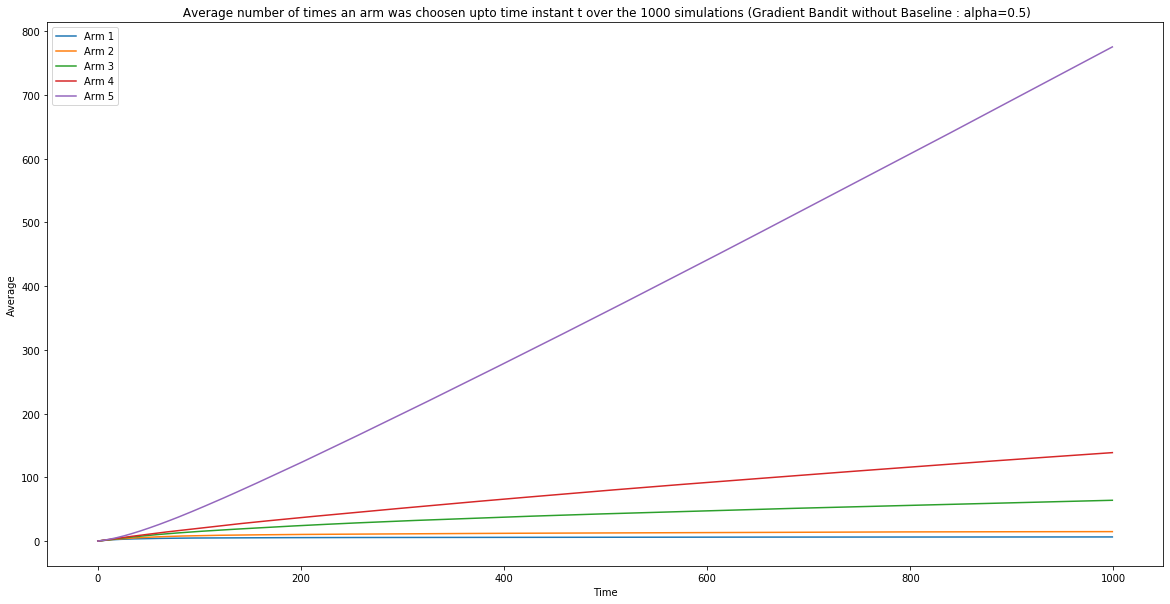

In [202]:
plt.figure(figsize = (20,10))
plt.plot(avgt_gb5[0], label = 'Arm 1')
plt.plot(avgt_gb5[1], label = 'Arm 2')
plt.plot(avgt_gb5[2], label = 'Arm 3')
plt.plot(avgt_gb5[3], label = 'Arm 4')
plt.plot(avgt_gb5[4], label = 'Arm 5')
plt.xlabel('Time')  
plt.ylabel('Average')
plt.title(' Average number of times an arm was choosen upto time instant t over the 1000 simulations (Gradient Bandit without Baseline : alpha=0.5)')
plt.legend(loc='upper left')